# Data Visualization with Seaborn and Scikit Learn Decision Trees

In this lab, you will learn how to use [Seaborn](https://seaborn.pydata.org/), a popular
data visualization package in Python.  Next, it illustrates how to create decision trees
in Scikit Learn to perform both classification and regression.  

## Activity 1 - Data Visualization
Let's start by investigating Scikit learn''s wine dataset.
The code block below shows that this data is stored as a *sklearn.utils.Bunch* object.
This object is an extension of the Python dictionary class (see the 
[sklearn.utils.bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)
site for more information).  It enables  you to use it as a dictionary (looking up values by key), or to look up the same variables as attributes.  For example, these two lines of code will both reference the data matrix within a bunch:
- wine_data['data']
- wine_data.data

To start, let's load a few modules and the wine dataset.  The code below will also print 
out the keys to the dictionary.

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

wine_data = datasets.load_wine()
type (wine_data)

for key in wine_data:
    print('key:',key,'\t datatype of value is is:',type(wine_data[key]))
    

key: data 	 datatype of value is is: <class 'numpy.ndarray'>
key: target 	 datatype of value is is: <class 'numpy.ndarray'>
key: frame 	 datatype of value is is: <class 'NoneType'>
key: target_names 	 datatype of value is is: <class 'numpy.ndarray'>
key: DESCR 	 datatype of value is is: <class 'str'>
key: feature_names 	 datatype of value is is: <class 'list'>


In [15]:
"""
you can write code here to assist in answering 
the above questions
"""


# YOUR CODE HERE
print(wine_data['data'].shape)
print(wine_data['target'].shape)
print(wine_data['feature_names'])
print(wine_data['target_names'].shape)


(178, 13)
(178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


# <span style="color:red">Questions</span>

1. data and target are numpy arrays. What are the dimensions of these arrays?
  
data is a (178,13) an array of 178 13 lenght arrays
and target is (178,) a 178 length array


  

2.  *feature_names* is a list. What are the dimensions of the list and do they match any of dimensions of data or target.

feature_names is (13,) which matches the second demension in data





3. What is the difference between target_names and feature_names?

feature_names is all the different atributes that the wine could have and target_names are the classifications of the wines into 3 different classes





c:\Users\tommy\cs445_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


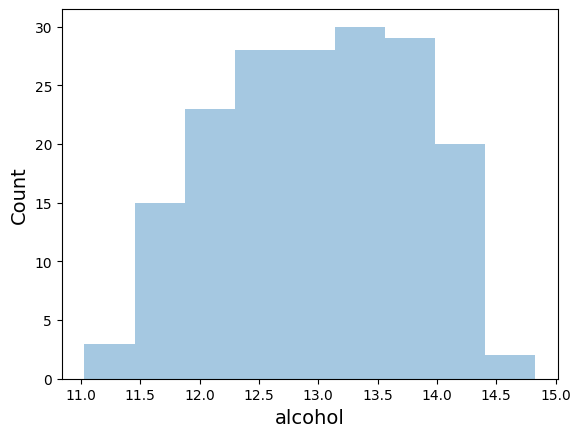

c:\Users\tommy\cs445_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tommy\cs445_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tommy\cs445_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

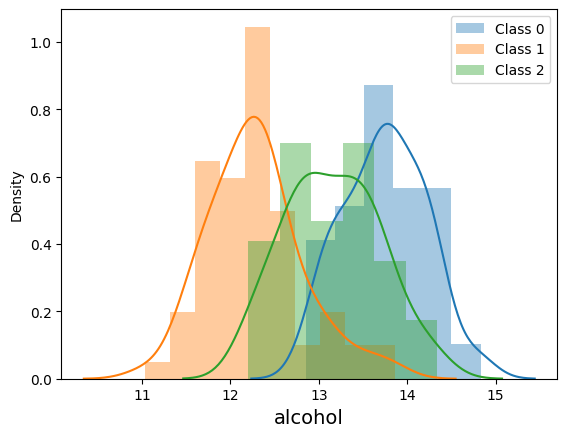

In [14]:
import seaborn as sns
data = wine_data['data']

alcoholDist = sns.distplot(data[:,0],kde=False)
plt.xlabel(wine_data['feature_names'][0],fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.savefig(fname='wine_data_alcohol_distribution.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)

plt.show()

for i in np.unique(wine_data['target']):
    sns.distplot(data[wine_data['target']==i,0],kde=True,label='Class {}'.format(i))
plt.legend() 
plt.xlabel(wine_data['feature_names'][0],fontsize=14)
plt.savefig(fname='wine_data_alcohol_distribution_by_class.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()


# <span style="color:red">Question</span>

What does this line shown below of python do in the above code?  How value does it evaluate to and how does it work?


**wine_data['target'] == i**

Filters the data based on th
     
   
   

In [ ]:
"""   
Create a block of code that draws distribution plots for each of the features in the wine_data 
bunch.  Your distribution plots need to have the x axis labeled with the feature name
(as in the above example).
"""



# YOUR CODE HERE
raise NotImplementedError()

## Activity 3 -- Distributions Visualized with Boxplots

A [Boxplot](https://en.wikipedia.org/wiki/Box_plot), or whisker plot, shows
the distribution of the data (like the lines do in the above plot), but highlight the quartiles and showcases [outliers](https://en.wikipedia.org/wiki/Outlier), which can skew
values like the mean and variance.  

Creating boxplots using seaborn is a little tricky using numpy arrays.  Seaborn works well with another python package named [pandas](https://pandas.pydata.org/).  In this course, we will not spend a lot of time working
with pandas, but it is a very useful tool.  The second section of the code below copies the sklearn *bunch* 
into a pandas *dataframe*.  It then draws the boxplot for alcohol again.  Notice that the second chart axis is labeled (a benefit since the pandas dataframe relates the feature_names to the columns of the data).

The power of the pandas dataframe is also shown as a set of descritive statistics
are printed for the alcohol feature (for the entire dataset and for each class).  Notice
that the quartiles shown in the text table line up with the lines and boxes shown
in the boxplot.


In [ ]:

import pandas as pd

x = sns.boxplot(x=data[:,0],y=wine_data['target'],orient='h')
plt.show()

## repeat now using pandas dataframe and Seaborn
wine_df = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
wine_df['target'] = wine_data['target']
wine_df['class'] = wine_df['target'].map(lambda ind: wine_data['target_names'][ind])
sns.boxplot(x='alcohol',y='class',data=wine_df)
plt.rcParams["axes.labelsize"] = 16
plt.savefig(fname='wine_data_boxplot_by_class.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

print(wine_df['alcohol'].describe())
print('')

print(wine_df.groupby('class')['alcohol'].describe())


# <span style="color:red">Question</span>

- Create code to draw a boxplot for each feature using the data that is in the pandas dataframe (wine_df)



In [ ]:
## Write code to produce a *boxplot* for each feature.
## You can use the data in the pandas dataframe and the wine_data bunch.

# YOUR CODE HERE
raise NotImplementedError()

# <span style="color:red">Question</span>

- What is the approximate value of malic_acid that 25% of the class 2 wine's have a value that is equal to or lower than? (in other words, the 25th percentile)?


## *YOUR ANSWER HERE*

## Activity 4 Building a Decision Tree

We will now turn to building a decision tree using sklearn''s **DecisionTreeClassifier**.  To measure node
*impurity*, the tree will use **entropy** (as discussed in the prior lab and section 3.3.3 of the IDD textbook).
We will start by creating a decision tree with just a single split, which is commonly
referred to as a **decision stump**.  

In [ ]:
from sklearn import tree

classifier = \
    tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
classifier.fit(wine_data['data'],wine_data['target'])


treePlot = tree.plot_tree(classifier)

plt.show()

treePlot = tree.plot_tree(classifier, feature_names = wine_data['feature_names'])

plt.savefig(fname='wine_decisionstump.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()


The wine dataset contains 3 classes, but the entropy equation is the same:
- $-\sum_{i=0}^{c - 1} p_i(t)log_{2}p_{i}(t)$ 

where $p_i(t)$ is the relative frequency of training instances belonging to class $t$ and $c$ is the number of classes (and $0 log_{2}0 = 0$).

When classifying a new observation **p** (where the class is not known), the decision tree is traversed until a leaf node is reached.  The class that is it assigns is the **majority** class in the leaf.  

# <span style="color:red">Questions</span>
- Create a set of python code that:
  - What class will be predicted for a wine that has a flavanoid value of 1.4?
  - Create examples points to be classified and call the predict member function to classify them
    - declares a variable *p1* in the code block below that will be classified by the tree as class 2.
    - calls the *predict* member function within the classifier object and assign the return value to a variable named *y1*.  Verify that it is class 2.
    - declare a variable *p2* in the same code block that will be classified by the tree as class 0.
    - call *predict* sending *p2*, retain the results in a variable named *y2*, and verify that it is class 0 
    - create a new numpy matrix, named *test_data*, that holds both *p1* and *p2* and send the matrix to *predict*. You can look at using numpy's [vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) function to combine p1 and p2 together.
    
    

## *YOUR ANSWER HERE*

In [ ]:
# Activity Create datapoints 
# p1 so that it is classified as class 2
# p2 so that is is classifier as class 0

# YOUR CODE HERE
raise NotImplementedError()

y1_pred = classifier.predict(p1)
y2_pred = classifier.predict(p2)
y_pred = classifier.predict(test_data)

print('y1 class is {}'.format(y1_pred))
print('y2 class is {}'.format(y2_pred))
print(y_pred)






In [ ]:
# this code verifies that the preceeding block
# creates p1 and p2 per the instructions

classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
classifier.fit(wine_data['data'],wine_data['target'])

y1_pred = classifier.predict(p1)
y2_pred = classifier.predict(p2)
y_pred = classifier.predict(test_data)
assert(y1_pred[0] == 2)
assert(y2_pred[0] == 0)

assert(np.array_equal(y_pred,np.array([2, 0])))


# <span style="color:red">Question</span>
Compute the accuracy (in python) by calling the predict member function on 
*ALL* of the training data (do this in a single call).

Use python and numpy (not sklearn) to compute the 
accuracy of the tree on the training data.


In [ ]:
# Activity 3 Question 2

# YOUR CODE HERE
raise NotImplementedError()



## Activity 5 Regression with Decision Trees

While not very common, decision trees can also be used for **regression** (predicting real valued output).
Regression is discussed in [Appendix D](https://www-users.cs.umn.edu/~kumar001/dmbook/appendices_2ed.pdf) of the 
IDD textbook (and is only available online).

So far, we have used **accuracy** and **error_rate** as evaluation metrics for classification
(end of IDD section 3.2).

For regression, we will use the sum of squared error (SSE) and 
the mean squared error (MSE), which are defined below:
- <span style="font-family:Papyrus; font-size:1.5em;">SSE = $\sum_{i=0}^{n-1} |y_{i} - f(x_{i}) | $ </span>
  
- <span style="font-family:Papyrus; font-size:1.5em;">MSE = $\frac{1}{n} SSE$</span>

where:
- $n$ is the number of data points
- $y_{i}$ is the actual value for data point $i$ that we are trying to predict
- $x_{i}$ is **ALL** the features (a vector) describing data point $i$ (this
excludes the value we are trying to predict).
- $f(x_{i})$ is the predicted value from our model $m$, which is represented
here as a function named $f$.

Decision trees work roughly the same, except that node *impurity* is measured by ***MSE*** instead of entropy.  

This section will use the toy data for housing pricing. Let's start by loading a
benchmark for regression testing from the 1980sknown as the boston housing dataset. 
One of the features (zero-based #5) is the number of rooms in the house.  Let's 
plot that data to see how it correlates to the sales price of the home (the target
value of this regression problem).


In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt

boston_data = datasets.load_boston()

print(boston_data.DESCR)

print(boston_data.data[:,2])    
plt.scatter(boston_data.data[:,5],boston_data.target)
plt.xlabel('Nbr of Rooms')
plt.ylabel('Cost (1k dollars)')
plt.savefig(fname='housing_room_vs_cost.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(boston_data.data[:,2],boston_data.data[:,5],boston_data.target)
ax.set_xlabel('Nbr of Rooms')
ax.set_ylabel('% of industry')
ax.set_zlabel('Cost (1k dollars)')
#ax.zaxis._axinfo['label']['space_factor'] = 2.8
#ax.zaxis.labelpad = 30


plt.savefig(fname='housing_rooms_and_industry_vs_cost.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()

## Look at feature 5 and feature 

Notice that there seems to be a relationship between the number
of rooms and the price of a home (which makes sense).  

Recall that a decision tree classifier labels
a new point *p* by traversing the tree until a leaf node is encountered,
and then uses the majority class in the leaf node to label point *p* 
with that class.
  
[Regression tree's](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) do not
assign class labels but assign a **number (real valued answer)**.  
To make a prediction for 
point *p*, the tree is travsered until a leaf node is reached (the same as before).
The predicted value for point *p* is the average value of the predicted variable 
for the data points in the leaf node.  

The predicted target value for regression is commonly
referred to as $\hat{y}$ and the **true** answer is referred to as $y$.  

Let's build a regression tree (stump) using the Scikit learn package.  


In [ ]:
"""
Build a regressor tree using only feature 5 (number of rooms).  The target
value of this regression is the median home value (MEDV).
"""
regress_classifier = tree.DecisionTreeRegressor(max_leaf_nodes=2)

regress_classifier.fit(boston_data['data'],boston_data.target)

yhat = regress_classifier.predict(boston_data.data)

tree.plot_tree(regress_classifier,feature_names = boston_data.feature_names)
plt.savefig(fname='boston_data_regressor_stump.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)

plt.show()


# <span style="color:red">Question</span>
Compute the MSE by calling predict on the tree for all the values
in the training set.
Assign the MSE to a variable named mse.


In [ ]:
"""
Compute the MSE on the training data
and assign to a variable named *mse*.
"""

# YOUR CODE HERE
raise NotImplementedError()


In [ ]:
try: mse
except NameError:
    print('an mse variable is not SET')
    assert(False)


# Review of Predictions

We can vary the number of rooms in the house and see what our model will
output, and then plot this over the scatter plot of training points.
This visually shows how closely the model is following
the training data.  

The tree is printed again to allow an easy side by side
comparison between the item plots.  Notice that the red line
(output from the model) changes direction just as
the decision tree split points instruct it to.

In [ ]:
# plot the tree

tree.plot_tree(regress_classifier,max_depth=4)
plt.show()


# create a set of input values for rooms
# the other variables are not used in the model, but, model
# expects values for these other variables


X = np.zeros((25,boston_data.data.shape[1]))

room_values = np.linspace(4,9,25)
X[:,5] = room_values

# predict the output
yhat =  regress_classifier.predict(X)

# plot training data with nbr rooms versus price
plt.scatter(boston_data['data'][:,5],boston_data['target'], alpha=0.5)
plt.plot(room_values,yhat,c='r',lw=3)
plt.xlabel('Nbr of rooms', fontsize=16)
plt.ylabel('Price (1k dollars)')
plt.savefig(fname='boston_data_stump_room_predictions.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)
plt.show()



## Activity 6 Larger trees

So far we have used a node (decision stump) to simplify our analysis (this
also makes some of the visualization much easier). Decision trees can be built having 
more than one split point.  

In this example, the features are being eliminated to just the number of rooms feature
to make the analysis easier.  Note that once a feature is selected as a split point, it
does **NOT** eliminate it from being selected again for another node.  Thus, an entire
tree can be constructed even with a single feature.

The code section below builds trees with more than one split point.  Note that the MSE
is very low on the training data, meaning our model
is doing a great job predicting home prices, right?

Note that this tree is a very large tree with 475 leaves.  Recall how many 
points were in the training data?



In [ ]:
regress_classifier = tree.DecisionTreeRegressor()


X_single_feature = boston_data.data[:,5].reshape(-1,1)

regress_classifier.fit(X_single_feature, boston_data.target)

print("Training data points: {} Number of leaves: {}".
      format(boston_data.data.shape[0], regress_classifier.get_n_leaves()))


yhat = regress_classifier.predict(X_single_feature)

mse = np.sum((yhat - boston_data.target)**2)/yhat.size

print("MSE: {:.4f}".format(mse))

In [ ]:

room_values = np.linspace(4,9,100)

yhat =  regress_classifier.predict(room_values.reshape(-1,1))


plt.scatter(boston_data['data'][:,5],boston_data['target'], alpha=0.5)

plt.plot(room_values,yhat,c='r',lw=3)
plt.xlabel('Nbr of rooms', fontsize=16)
plt.ylabel('Price (1k dollars)')
plt.savefig(fname='boston_data_maxleaves_room_predictions.pdf', dpi=300,bbox_inches='tight',pad_inches=0.05)



plt.show()